In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path_file = 'C:\\Users\\danie\\Documents\\tfm\\tfm\\other\\wavLM.xlsx'
df = pd.read_excel(path_file)\
       .drop('seed', axis=1)
df.head()

,layer,train_loss,train_acc,train_urs,dev_loss,dev_acc,dev_urs,test_loss,test_acc,test_urs
0,1,1.028891,66.300000,66.456217,1.136460,62.200000,65.120275,3.045834,41.787302,70.298211
1,1,1.032233,66.269250,66.401318,1.147185,61.639440,64.003436,3.045743,42.277442,71.928429
2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,1.027964,66.626925,66.483667,1.134477,62.018670,64.604811,3.038348,41.673316,69.860835
4,2,1.031166,66.358669,66.593467,1.143595,61.551925,63.573883,3.040069,42.288841,71.212724


In [3]:
df = df.dropna()

In [4]:
# Filter out non-numeric columns
numeric_cols = df.select_dtypes(include=[float, int]).columns

# Group by 'layer' and compute mean and standard deviation for numeric columns
grouped_stats = df.groupby('layer')[numeric_cols].agg(['mean', 'std'])

grouped_stats

train_loss            train_acc            train_urs           \
                  mean       std       mean       std       mean      std   
layer                                                                       
1             1.030562  0.002364  66.284625  0.021744  66.428767  0.03882   
2             1.029565  0.002264  66.492797  0.189686  66.538567  0.07764   
3             1.027318  0.002271  66.537506  0.154559  66.730716  0.11646   
4             1.024774  0.002534  66.646796  0.014051  66.991491  0.25233   
5             1.021311  0.002027  66.805763  0.224813  67.348339  0.17469   
6             1.018026  0.002174  66.865375  0.098356  67.691463  0.19410   
7             1.014916  0.002070  66.969697  0.189686  67.924787  0.01941   
8             1.012369  0.001761  67.034277  0.042152  68.048312  0.03882   
9             1.010744  0.002263  67.153502  0.154559  68.199286  0.13587   
10            1.009007  0.001835  67.108793  0.063229  68.309086  0.13587   
11            1.007677  0.003320  67.218082  0.288042  68.473785  0.32997   
12            0.991274  0.000886  67.744660  0.133483  69.942355  0.50466   
3, 6, 9, 12   0.936400  0.002213  69.925484  0.042152  74.389240  0.58230   
6, 12         0.969271  0.000082  68.524590  0.112406  71.726599  0.23292   

             dev_loss              dev_acc              dev_urs            \
                 mean       std       mean       std       mean       std   
layer                                                                       
1            1.141822  0.007584  61.919720  0.396376  64.561856  0.789724   
2            1.139036  0.006448  61.785298  0.330038  64.089347  0.728976   
3            1.137901  0.007359  62.033256  0.350666  64.690722  0.728976   
4            1.134847  0.007640  62.047841  0.412548  64.647766  0.546732   
5            1.130941  0.006742  62.149942  0.350666  65.335052  0.668228   
6            1.126246  0.007143  62.441657  0.185646  65.592784  0.425236   
7            1.122944  0.006842  62.602100  0.247529  66.408935  0.364488   
8            1.119497  0.005548  62.645858  0.474430  66.537801  0.546732   
9            1.118127  0.006316  62.777130  0.330038  66.666667  0.121496   
10           1.118155  0.006255  62.733372  0.226901  66.709622  0.182244   
11           1.116924  0.007623  62.762544  0.391920  66.323024  0.242992   
12           1.103104  0.005233  63.068845  0.165019  68.127148  0.607480   
3, 6, 9, 12  1.051904  0.003224  64.994166  0.123764  74.054983  0.850472   
6, 12        1.078974  0.001383  63.958576  1.093251  68.685567  1.275708   

            test_loss             test_acc             test_urs            
                 mean       std       mean       std       mean       std  
layer                                                                      
1            3.045789  0.000064  42.032372  0.346581  71.113320  1.152739  
2            3.039209  0.001217  41.981078  0.435242  70.536779  0.955930  
3            3.031007  0.003618  42.089365  0.636743  70.974155  1.180854  
4            3.025182  0.006477  42.095064  0.419122  71.053678  1.012161  
5            3.022799  0.005209  42.254645  0.306281  71.570577  1.012161  
6            3.015048  0.004361  42.362932  0.282101  72.047714  0.843467  
7            3.008215  0.004337  42.551009  0.370762  72.604374  0.674774  
8            3.015336  0.003451  42.590904  0.443302  72.942346  0.759121  
9            3.005791  0.003467  42.636498  0.427182  72.962227  0.843467  
10           2.996389  0.003076  42.511114  0.572262  72.723658  1.124623  
11           2.991822  0.009507  42.642198  0.483602  72.723658  1.293317  
12           3.001224  0.003592  42.921464  0.427182  73.996024  1.068392  
3, 6, 9, 12  3.037351  0.005880  44.232304  0.443302  78.727634  0.224925  
6, 12        2.986574  0.007744  43.907443  0.193441  74.771372  1.602588

In [5]:
grouped_stats = pd.concat([grouped_stats.iloc[:-2], grouped_stats.iloc[[-1]], grouped_stats.iloc[[-2]]])
grouped_stats

train_loss            train_acc            train_urs           \
                  mean       std       mean       std       mean      std   
layer                                                                       
1             1.030562  0.002364  66.284625  0.021744  66.428767  0.03882   
2             1.029565  0.002264  66.492797  0.189686  66.538567  0.07764   
3             1.027318  0.002271  66.537506  0.154559  66.730716  0.11646   
4             1.024774  0.002534  66.646796  0.014051  66.991491  0.25233   
5             1.021311  0.002027  66.805763  0.224813  67.348339  0.17469   
6             1.018026  0.002174  66.865375  0.098356  67.691463  0.19410   
7             1.014916  0.002070  66.969697  0.189686  67.924787  0.01941   
8             1.012369  0.001761  67.034277  0.042152  68.048312  0.03882   
9             1.010744  0.002263  67.153502  0.154559  68.199286  0.13587   
10            1.009007  0.001835  67.108793  0.063229  68.309086  0.13587   
11            1.007677  0.003320  67.218082  0.288042  68.473785  0.32997   
12            0.991274  0.000886  67.744660  0.133483  69.942355  0.50466   
6, 12         0.969271  0.000082  68.524590  0.112406  71.726599  0.23292   
3, 6, 9, 12   0.936400  0.002213  69.925484  0.042152  74.389240  0.58230   

             dev_loss              dev_acc              dev_urs            \
                 mean       std       mean       std       mean       std   
layer                                                                       
1            1.141822  0.007584  61.919720  0.396376  64.561856  0.789724   
2            1.139036  0.006448  61.785298  0.330038  64.089347  0.728976   
3            1.137901  0.007359  62.033256  0.350666  64.690722  0.728976   
4            1.134847  0.007640  62.047841  0.412548  64.647766  0.546732   
5            1.130941  0.006742  62.149942  0.350666  65.335052  0.668228   
6            1.126246  0.007143  62.441657  0.185646  65.592784  0.425236   
7            1.122944  0.006842  62.602100  0.247529  66.408935  0.364488   
8            1.119497  0.005548  62.645858  0.474430  66.537801  0.546732   
9            1.118127  0.006316  62.777130  0.330038  66.666667  0.121496   
10           1.118155  0.006255  62.733372  0.226901  66.709622  0.182244   
11           1.116924  0.007623  62.762544  0.391920  66.323024  0.242992   
12           1.103104  0.005233  63.068845  0.165019  68.127148  0.607480   
6, 12        1.078974  0.001383  63.958576  1.093251  68.685567  1.275708   
3, 6, 9, 12  1.051904  0.003224  64.994166  0.123764  74.054983  0.850472   

            test_loss             test_acc             test_urs            
                 mean       std       mean       std       mean       std  
layer                                                                      
1            3.045789  0.000064  42.032372  0.346581  71.113320  1.152739  
2            3.039209  0.001217  41.981078  0.435242  70.536779  0.955930  
3            3.031007  0.003618  42.089365  0.636743  70.974155  1.180854  
4            3.025182  0.006477  42.095064  0.419122  71.053678  1.012161  
5            3.022799  0.005209  42.254645  0.306281  71.570577  1.012161  
6            3.015048  0.004361  42.362932  0.282101  72.047714  0.843467  
7            3.008215  0.004337  42.551009  0.370762  72.604374  0.674774  
8            3.015336  0.003451  42.590904  0.443302  72.942346  0.759121  
9            3.005791  0.003467  42.636498  0.427182  72.962227  0.843467  
10           2.996389  0.003076  42.511114  0.572262  72.723658  1.124623  
11           2.991822  0.009507  42.642198  0.483602  72.723658  1.293317  
12           3.001224  0.003592  42.921464  0.427182  73.996024  1.068392  
6, 12        2.986574  0.007744  43.907443  0.193441  74.771372  1.602588  
3, 6, 9, 12  3.037351  0.005880  44.232304  0.443302  78.727634  0.224925

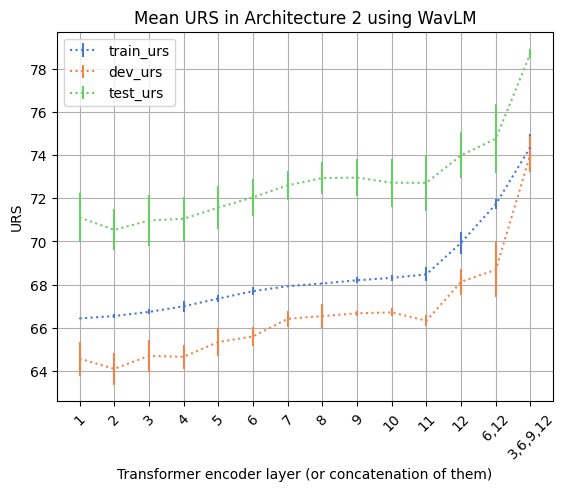

In [13]:
# Plotting mean values with error bars
fig, ax = plt.subplots()

for idx, col in enumerate(['train_urs', 'dev_urs', 'test_urs']):
    mean_values = grouped_stats[col]['mean']
    std_values = grouped_stats[col]['std']
    ax.errorbar(range(len(grouped_stats.index)), mean_values, yerr=std_values, label=col, linestyle=':', color=sns.color_palette("muted")[idx])

ax.set_xlabel('Transformer encoder layer (or concatenation of them)')
ax.set_ylabel('URS')
ax.set_title('Mean URS in Architecture 2 using WavLM')
ax.legend()
ax.set_xticks(range(len(grouped_stats.index)))
ax.set_xticklabels(['1', '2', '3', '4','5', '6', '7', '8', '9', '10', '11', '12', '6,12', '3,6,9,12',], rotation=45)
plt.grid(True)
plt.show()

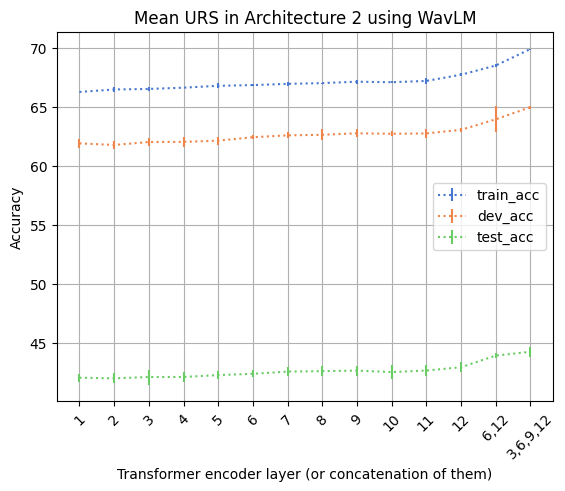

In [12]:
# Plotting mean values with error bars
fig, ax = plt.subplots()

for idx, col in enumerate(['train_acc', 'dev_acc', 'test_acc']):
    mean_values = grouped_stats[col]['mean']
    std_values = grouped_stats[col]['std']
    ax.errorbar(range(len(grouped_stats.index)), mean_values, yerr=std_values, label=col, linestyle=':', color=sns.color_palette("muted")[idx])

ax.set_xlabel('Transformer encoder layer (or concatenation of them)')
ax.set_ylabel('Accuracy')
ax.set_title('Mean URS in Architecture 2 using WavLM')
ax.legend()
ax.set_xticks(range(len(grouped_stats.index)))
ax.set_xticklabels(['1', '2', '3', '4','5', '6', '7', '8', '9', '10', '11', '12', '6,12', '3,6,9,12',], rotation=45)
plt.grid(True)
plt.show()

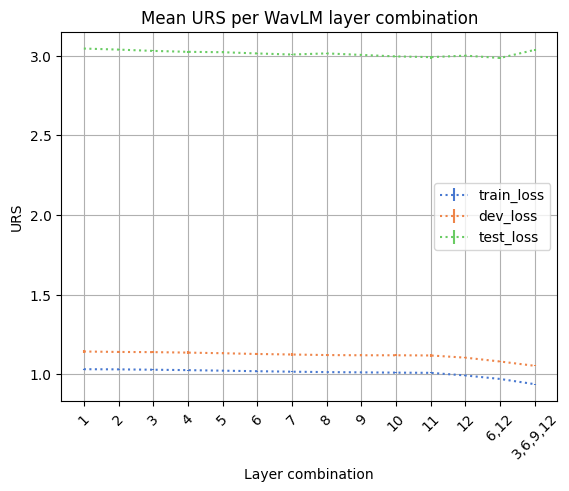

In [8]:
# Plotting mean values with error bars
fig, ax = plt.subplots()

for idx, col in enumerate(['train_loss', 'dev_loss', 'test_loss']):
    mean_values = grouped_stats[col]['mean']
    std_values = grouped_stats[col]['std']
    ax.errorbar(range(len(grouped_stats.index)), mean_values, yerr=std_values, label=col, linestyle=':', color=sns.color_palette("muted")[idx])

ax.set_xlabel('Layer combination')
ax.set_ylabel('URS')
ax.set_title('Mean URS per WavLM layer combination')
ax.legend()
ax.set_xticks(range(len(grouped_stats.index)))
ax.set_xticklabels(['1', '2', '3', '4','5', '6', '7', '8', '9', '10', '11', '12', '6,12', '3,6,9,12',], rotation=45)
plt.grid(True)
plt.show()